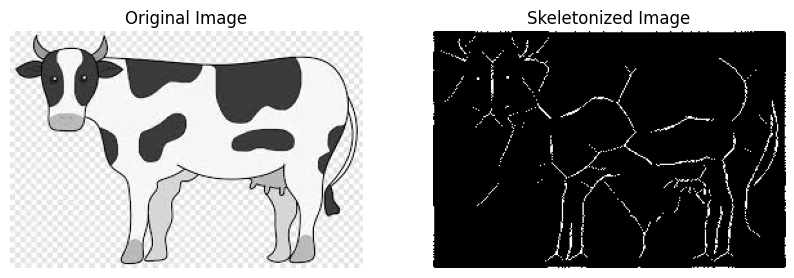

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def skeletonize(image):
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)

    ret, img = cv2.threshold(image, 127, 255, 0)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    done = False

    while not done:
        eroded = cv2.erode(img, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img = eroded.copy()

        zeros = size - cv2.countNonZero(img)
        if zeros == size:
            done = True

    return skel

# Baca gambar
img = cv2.imread('Downloads/sapi 2.jpg', cv2.IMREAD_GRAYSCALE)

# Skeletonization
skeleton = skeletonize(img)

# Tampilkan gambar menggunakan Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(skeleton, cmap='gray')
plt.title('Skeletonized Image')
plt.axis('off')

plt.show()
